# CNN(Convolutional Neural Network)

## Convolutional layers


> **w = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01)) : 32 filters (3x3x1)**
> > 3x3x1 필터를 32개 만들 것(너비(3), 높이(3), 입력채널(1), 출력채널(32)를 뜻함)

> ** tf.nn.conv2d(X, w, strides=[1, 2, 1, 1], padding = 'SAME')**
> > tf.nn.conv2d(input, filter, strides, padding, use_cudnn_on_gpu=None, data_format = None, name= None)

> > input : [batch, in_height, in_width, in_channels] 형식. 28x28x1 형식의 손글씨 이미지

> > filter : [filter_height, filter_width, in_channels, out_channels] 형식. 3, 3, 1, 32의 w.

> > strides : 크기 4인 1차원 리스트. [0], [3]은 반드시 1. 일반적으로 [1],[2]는 같은 값 사용.

> > padding : 'SAME' 또는 'VALID'. 패딩을 추가하는 공식의 차이. SAME은 출력 크기를 입력과 같게 유지한다.

>> **activation map** : 출력 채널을 부르는 용어로, padding='SAME'을 준 경우, 원본이미지와 똑같은 28x28x1의 형태가 된다.


## ReLU

> l = tf.nn.conv2d(X, w, [1, 1, 1, 1], 'SAME')

> **l1a = tf.nn.relu(tf.nn.conv2d(X, w, [1, 1, 1, 1], 'SAME'))**
>> conv를 적용한 결과를 ReLU에 전달하고 있다. 그냥 매개변수로 전달하면 된다.

## Pooling layer(sampling)

> **l1 = tf.nn.max_pool(c1, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')**

> **tf.nn.max_pool(value, ksize, strides, padding, data_format='NHWC',name=None)**
>> value : [batch, height, width, channels] 형식의 입력데이터. ReLU를 통과한 출력 결과가 된다.

>> ksize : 4개 이상의 크기를 갖는 리스트로 입력 데이터의 각 차원 윈도우 크기.
>> ksize가 [1,2,2,1]이라는 뜻은 2칸씩이동하면서 출력 결과를 1개 만들어 낸다는 것이다. 다시 말해 4개의 데이터 중에서 가장 큰 1개를 반환하는 역할을 한다. 

>> data_format : NHWC 또는 NCHW. n-count, height, width, channel의 약자 사용.






## load data from google drive

In [0]:
#colab에서 google drive로 접속

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls -al /content/drive/'My Drive'/vinzip/vinzip/trainingSet

label_dict = {
    0: 'bottom',
    1: 'outer',
    2: 'top'
}

total 12
drwx------ 2 root root 4096 Dec  2 08:20 bottom
drwx------ 2 root root 4096 Dec  2 08:20 outer
drwx------ 2 root root 4096 Dec  2 08:20 top


In [0]:
import os, cv2   
import numpy as np 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  

import tensorflow as tf

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

os.environ["CUDA_VISIBLE_DEVICES"]="0"



# image data를 array로 불러오는 함수
def img_to_array(dir, grayscale=True):
  images=[]
  labels=[]
  dir_folder = np.array(os.listdir(dir))
  
  # 데이터 전처리 (문자로된 폴더 리스트를 숫자형 array로 변환) -> one-hot encoding
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(dir_folder)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  
  onehot_encoder = OneHotEncoder(sparse=False) 
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
  
  #image file을 array로 변환->라벨과 함께 각각 리스트에 append 해준다
  for idx in range(len(dir_folder)):
    path = os.path.join(dir,dir_folder[idx]) + '/'
    img_list = os.listdir(path)
    print('------ loding... -------',path)
    for img in img_list:
      img_path = os.path.join(path, img)
      if grayscale==True:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      else : img = cv2.imread(img_path)
      images.append([np.array(img)])
      labels.append([np.array(onehot_encoded[idx])])
      
  images = np.reshape(images,(-1,4096)).astype(np.float32)
  labels = np.reshape(labels,(-1,3)).astype(np.float32)
  print('DONE!',dir)
  
  return images, labels

In [0]:
g_TRAIN_DIR = '/content/drive/My Drive/vinzip/vinzip/trainingSet/'
g_TEST_DIR ='/content/drive/My Drive/vinzip/vinzip/testSet/'

train_input, train_label = img_to_array(g_TRAIN_DIR)
test_input, test_label = img_to_array(g_TEST_DIR)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


------ loding... ------- /content/drive/My Drive/vinzip/vinzip/trainingSet/outer/
------ loding... ------- /content/drive/My Drive/vinzip/vinzip/trainingSet/top/
------ loding... ------- /content/drive/My Drive/vinzip/vinzip/trainingSet/bottom/
DONE! /content/drive/My Drive/vinzip/vinzip/trainingSet/


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


------ loding... ------- /content/drive/My Drive/vinzip/vinzip/testSet/outer/
------ loding... ------- /content/drive/My Drive/vinzip/vinzip/testSet/top/
------ loding... ------- /content/drive/My Drive/vinzip/vinzip/testSet/bottom/
DONE! /content/drive/My Drive/vinzip/vinzip/testSet/


In [0]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=train_input.shape))
print("Training set (labels) shape: {shape}".format(shape=train_label.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=test_input.shape))
print("Test set (labels) shape: {shape}".format(shape=test_label.shape))

Training set (images) shape: (6000, 4096)
Training set (labels) shape: (6000, 3)
Test set (images) shape: (1300, 4096)
Test set (labels) shape: (1300, 3)


Text(0.5,1,'(Label: top)')

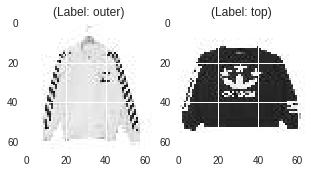

In [0]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(train_input[0], (64,64))
curr_lbl = np.argmax(train_label[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(train_input[4000], (64,64))
curr_lbl = np.argmax(train_label[4000,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

In [0]:
train_X = train_input.reshape(-1, 64, 64, 1)
test_X = test_input.reshape(-1,64, 64,1)
print(train_X.shape, test_X.shape)

train_y = train_label
test_y = test_label
print(train_y.shape, test_y.shape)


(6000, 64, 64, 1) (1300, 64, 64, 1)
(6000, 3) (1300, 3)


## 1st try
> 1.   training_iters = 200 ,
learning_rate = 0.001 ,
batch_size = 600

> 2.   xavier_initializer

> 3. dropout X

> 4. ReLU 사용

> 5. Adam optimizer

**result**

> Iter 200, Loss= 0.000125, Training Accuracy= 1.00000

> Testing Accuracy: 0.80769

> :: *overfitting*



In [0]:
tf.reset_default_graph()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

tf.reset_default_graph()
a = tf.constant([1, 1, 1, 1, 1], dtype=tf.float32)
graph_level_seed = 1
operation_level_seed = 1
tf.set_random_seed(graph_level_seed)
b = tf.nn.dropout(a, 0.5, seed=operation_level_seed)


training_iters = 200 
learning_rate = 0.001 
batch_size = 600

#data input
n_input = 64

#total classes
n_classes = 3


#both placeholders are of type float
x = tf.placeholder("float", [None, n_input, n_input,1])
y = tf.placeholder("float", [None, n_classes])


def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) 

  
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')
  
def dropout2d(x, prob_conv=0.8):
  return tf.nn.dropout(x,prob_conv)
  
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wd1': tf.get_variable('W3', shape=(8*8*128,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(n_classes), initializer=tf.contrib.layers.xavier_initializer()),
}

def conv_net(x, weights, biases):  

    # here we call the conv2d function we had defined above and pass the input image x, weights wc1 and bias bc1.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14 matrix.
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    # here we call the conv2d function we had defined above and pass the input image x, weights wc2 and bias bc2.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 7*7 matrix.
    conv2 = maxpool2d(conv2, k=2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 4*4.
    conv3 = maxpool2d(conv3, k=2)


    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out
  
  
  
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# Initializing the variables
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(1,training_iters+1):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        if i%10==0 :
          print("Iter " + str(i) + ", Loss= " + \
                        "{:.6f}".format(loss) + ", Training Accuracy= " + \
                        "{:.5f}".format(acc))
          print("Optimization Finished!")

          # Calculate accuracy for all test images
          test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X, y: test_y})
          train_loss.append(loss)
          test_loss.append(valid_loss)
          train_accuracy.append(acc)
          test_accuracy.append(test_acc)
          print("Testing Accuracy:","{:.5f}".format(test_acc))
    results = sess.run(correct_prediction,feed_dict={ x: test_X, y: test_y})
    summary_writer.close()

Iter 10, Loss= 0.649779, Training Accuracy= 0.64833
Optimization Finished!
Testing Accuracy: 0.58385
Iter 20, Loss= 0.494111, Training Accuracy= 0.75333
Optimization Finished!
Testing Accuracy: 0.64538
Iter 30, Loss= 0.335324, Training Accuracy= 0.80500
Optimization Finished!
Testing Accuracy: 0.69538
Iter 40, Loss= 0.329116, Training Accuracy= 0.82500
Optimization Finished!
Testing Accuracy: 0.64615
Iter 50, Loss= 0.154772, Training Accuracy= 0.94167
Optimization Finished!
Testing Accuracy: 0.68077
Iter 60, Loss= 0.065993, Training Accuracy= 0.97667
Optimization Finished!
Testing Accuracy: 0.72077
Iter 70, Loss= 0.047988, Training Accuracy= 0.98333
Optimization Finished!
Testing Accuracy: 0.76385
Iter 80, Loss= 0.034445, Training Accuracy= 0.98833
Optimization Finished!
Testing Accuracy: 0.76769
Iter 90, Loss= 0.022543, Training Accuracy= 0.99167
Optimization Finished!
Testing Accuracy: 0.78000
Iter 100, Loss= 0.018732, Training Accuracy= 0.99667
Optimization Finished!
Testing Accurac

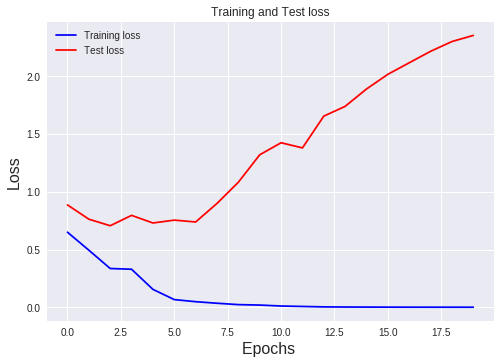

In [0]:
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

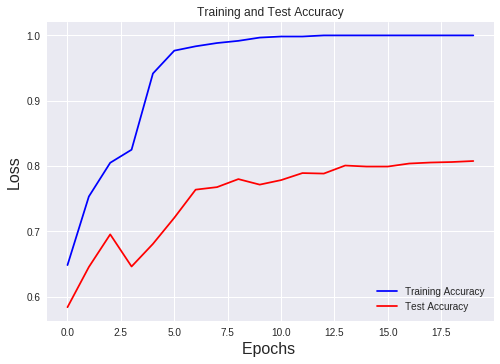

In [0]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()

## 2nd try
> 1.   training_iters = 200 ,  
learning_rate = 0.001 ,  
batch_size = 600

> 2.   xavier_initializer

>  **3. dropout O** 

> 4. ReLU 사용

> 5. Adam optimizer

**result**
> Iter 200, Loss= 0.089924, Training Accuracy= 0.97167

> Testing Accuracy: 0.75462




In [0]:
tf.reset_default_graph()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

tf.reset_default_graph()
a = tf.constant([1, 1, 1, 1, 1], dtype=tf.float32)
graph_level_seed = 1
operation_level_seed = 1
tf.set_random_seed(graph_level_seed)
b = tf.nn.dropout(a, 0.5, seed=operation_level_seed)


training_iters = 200 
learning_rate = 0.001 
batch_size = 600

#data input
n_input = 64

#total classes
n_classes = 3


#both placeholders are of type float
x = tf.placeholder("float", [None, n_input, n_input,1])
y = tf.placeholder("float", [None, n_classes])


def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) 

  
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')
  
def dropout2d(x, prob_conv=0.8):
  return tf.nn.dropout(x,prob_conv)
  
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wd1': tf.get_variable('W3', shape=(8*8*128,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(n_classes), initializer=tf.contrib.layers.xavier_initializer()),
}

def conv_net(x, weights, biases, dropout=False):  

    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)
#     if dropout==True:
#       conv1 = dropout2d(conv1)

    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)
#     if dropout==True:
#       conv2 = dropout2d(conv2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    conv3 = maxpool2d(conv3, k=2)
    if dropout==True:
      conv3 = dropout2d(conv3,prob_conv=0.5)

    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out
  
  
  
pred = conv_net(x, weights, biases, dropout=True)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# Initializing the variables
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(1,training_iters+1):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        if i%10==0 :
          print("Iter " + str(i) + ", Loss= " + \
                        "{:.6f}".format(loss) + ", Training Accuracy= " + \
                        "{:.5f}".format(acc))
          print("Optimization Finished!")

          # Calculate accuracy for all test images
          test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X, y: test_y})
          train_loss.append(loss)
          test_loss.append(valid_loss)
          train_accuracy.append(acc)
          test_accuracy.append(test_acc)
          print("Testing Accuracy:","{:.5f}".format(test_acc))
    results = sess.run(correct_prediction,feed_dict={ x: test_X, y: test_y})
    summary_writer.close()

Iter 10, Loss= 0.732341, Training Accuracy= 0.64833
Optimization Finished!
Testing Accuracy: 0.58231
Iter 20, Loss= 0.510157, Training Accuracy= 0.76333
Optimization Finished!
Testing Accuracy: 0.63462
Iter 30, Loss= 0.365239, Training Accuracy= 0.83500
Optimization Finished!
Testing Accuracy: 0.66000
Iter 40, Loss= 0.259229, Training Accuracy= 0.89833
Optimization Finished!
Testing Accuracy: 0.69308
Iter 50, Loss= 0.516568, Training Accuracy= 0.76000
Optimization Finished!
Testing Accuracy: 0.64846
Iter 60, Loss= 0.279354, Training Accuracy= 0.88167
Optimization Finished!
Testing Accuracy: 0.70000
Iter 70, Loss= 0.268423, Training Accuracy= 0.88833
Optimization Finished!
Testing Accuracy: 0.71538
Iter 80, Loss= 0.192545, Training Accuracy= 0.93000
Optimization Finished!
Testing Accuracy: 0.71923
Iter 90, Loss= 0.114573, Training Accuracy= 0.94667
Optimization Finished!
Testing Accuracy: 0.71846
Iter 100, Loss= 0.112809, Training Accuracy= 0.97000
Optimization Finished!
Testing Accurac

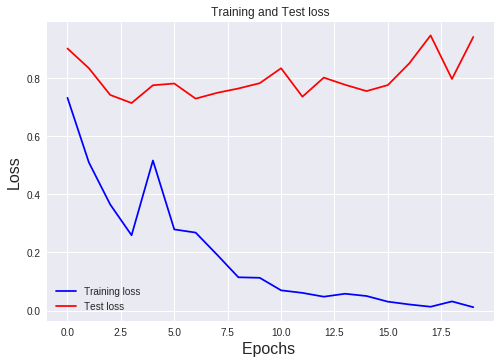

In [0]:
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

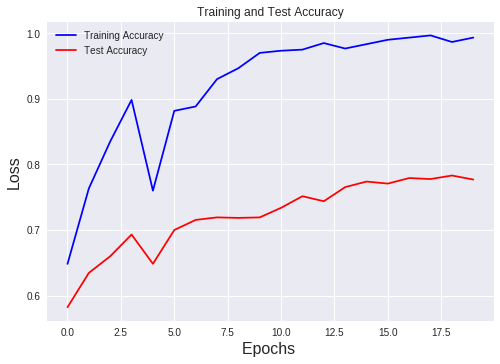

In [0]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()

## 3rd try
> 1.   training_iters = 200 ,
learning_rate = 0.001 ,
batch_size = 600

> 2.   xavier_initializer

>  3. dropout X

> 4. ReLU 사용

> **5. RMSProp optimizer**

**result**

> Iter 200, Loss= 0.000000, Training Accuracy= 1.00000  
Testing Accuracy: 0.85462




In [0]:
tf.reset_default_graph()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

tf.reset_default_graph()
a = tf.constant([1, 1, 1, 1, 1], dtype=tf.float32)
graph_level_seed = 1
operation_level_seed = 1
tf.set_random_seed(graph_level_seed)
b = tf.nn.dropout(a, 0.5, seed=operation_level_seed)


training_iters = 200 
learning_rate = 0.001 
batch_size = 600

#data input
n_input = 64

#total classes
n_classes = 3


#both placeholders are of type float
x = tf.placeholder("float", [None, n_input, n_input,1])
y = tf.placeholder("float", [None, n_classes])


def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) 

  
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')
  
def dropout2d(x, prob_conv=0.8):
  return tf.nn.dropout(x,prob_conv)
  
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wd1': tf.get_variable('W3', shape=(8*8*128,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(n_classes), initializer=tf.contrib.layers.xavier_initializer()),
}

def conv_net(x, weights, biases, dropout=False):  

    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)
    if dropout==True:
      conv1 = dropout2d(conv1)

    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)
    if dropout==True:
      conv2 = dropout2d(conv2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    conv3 = maxpool2d(conv3, k=2)
    if dropout==True:
      conv3 = dropout2d(conv3,prob_conv=0.5)

    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out
  
  
  
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)


#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# Initializing the variables
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(1,training_iters+1):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        if i%10==0 :
          print("Iter " + str(i) + ", Loss= " + \
                        "{:.6f}".format(loss) + ", Training Accuracy= " + \
                        "{:.5f}".format(acc))
          print("Optimization Finished!")

          # Calculate accuracy for all test images
          test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X, y: test_y})
          train_loss.append(loss)
          test_loss.append(valid_loss)
          train_accuracy.append(acc)
          test_accuracy.append(test_acc)
          print("Testing Accuracy:","{:.5f}".format(test_acc))
    results = sess.run(correct_prediction,feed_dict={ x: test_X, y: test_y})
    summary_writer.close()

Iter 10, Loss= 0.176846, Training Accuracy= 0.98833
Optimization Finished!
Testing Accuracy: 0.16923
Iter 20, Loss= 0.118404, Training Accuracy= 0.97833
Optimization Finished!
Testing Accuracy: 0.29769
Iter 30, Loss= 0.046384, Training Accuracy= 0.98833
Optimization Finished!
Testing Accuracy: 0.40000
Iter 40, Loss= 0.018959, Training Accuracy= 0.99500
Optimization Finished!
Testing Accuracy: 0.44538
Iter 50, Loss= 0.002668, Training Accuracy= 0.99833
Optimization Finished!
Testing Accuracy: 0.55615
Iter 60, Loss= 0.000237, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.47692
Iter 70, Loss= 0.000134, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.69692
Iter 80, Loss= 0.000178, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.73923
Iter 90, Loss= 0.000137, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.77154
Iter 100, Loss= 0.000000, Training Accuracy= 1.00000
Optimization Finished!
Testing Accurac

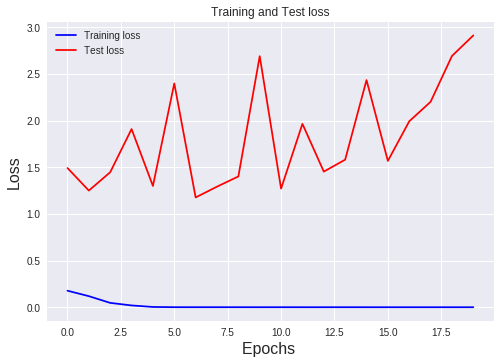

In [0]:
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

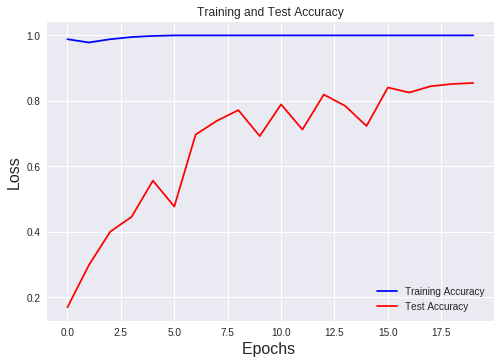

In [0]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()

## 4th try
> 1.   training_iters = 300 ,
learning_rate = 0.001 ,
batch_size = 600

> 2.   xavier_initializer

>  3. dropout X

> 4. ReLU 사용

> **5. NaAdam optimizer**

**result**
> Iter 200, Loss= 0.018376, Training Accuracy= 0.99500  
Testing Accuracy: 0.77538





In [0]:
tf.reset_default_graph()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

tf.reset_default_graph()
a = tf.constant([1, 1, 1, 1, 1], dtype=tf.float32)
graph_level_seed = 1
operation_level_seed = 1
tf.set_random_seed(graph_level_seed)
b = tf.nn.dropout(a, 0.5, seed=operation_level_seed)


training_iters = 300 
learning_rate = 0.001 
batch_size = 600

#data input
n_input = 64

#total classes
n_classes = 3


#both placeholders are of type float
x = tf.placeholder("float", [None, n_input, n_input,1])
y = tf.placeholder("float", [None, n_classes])


def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) 

  
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')
  
def dropout2d(x, prob_conv=0.8):
  return tf.nn.dropout(x,prob_conv)
  
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wd1': tf.get_variable('W3', shape=(8*8*128,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(n_classes), initializer=tf.contrib.layers.xavier_initializer()),
}

def conv_net(x, weights, biases, dropout=False):  

    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)
    if dropout==True:
      conv1 = dropout2d(conv1)

    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)
    if dropout==True:
      conv2 = dropout2d(conv2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    conv3 = maxpool2d(conv3, k=2)
    if dropout==True:
      conv3 = dropout2d(conv3,prob_conv=0.5)

    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out
  
  
  
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.contrib.opt.NadamOptimizer(learning_rate=learning_rate).minimize(cost)


#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# Initializing the variables
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(1,training_iters+1):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        if i%10==0 :
          print("Iter " + str(i) + ", Loss= " + \
                        "{:.6f}".format(loss) + ", Training Accuracy= " + \
                        "{:.5f}".format(acc))
          print("Optimization Finished!")

          # Calculate accuracy for all test images
          test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X, y: test_y})
          train_loss.append(loss)
          test_loss.append(valid_loss)
          train_accuracy.append(acc)
          test_accuracy.append(test_acc)
          print("Testing Accuracy:","{:.5f}".format(test_acc))
    results = sess.run(correct_prediction,feed_dict={ x: test_X, y: test_y})
    summary_writer.close()

Iter 10, Loss= 0.607765, Training Accuracy= 0.70667
Optimization Finished!
Testing Accuracy: 0.63692
Iter 20, Loss= 0.289775, Training Accuracy= 0.88000
Optimization Finished!
Testing Accuracy: 0.66538
Iter 30, Loss= 0.361839, Training Accuracy= 0.86333
Optimization Finished!
Testing Accuracy: 0.61769
Iter 40, Loss= 0.268079, Training Accuracy= 0.89500
Optimization Finished!
Testing Accuracy: 0.64538
Iter 50, Loss= 0.197623, Training Accuracy= 0.91833
Optimization Finished!
Testing Accuracy: 0.67923
Iter 60, Loss= 0.104173, Training Accuracy= 0.95333
Optimization Finished!
Testing Accuracy: 0.68154
Iter 70, Loss= 0.066919, Training Accuracy= 0.97333
Optimization Finished!
Testing Accuracy: 0.73462
Iter 80, Loss= 0.049875, Training Accuracy= 0.98000
Optimization Finished!
Testing Accuracy: 0.76538
Iter 90, Loss= 0.025799, Training Accuracy= 0.98667
Optimization Finished!
Testing Accuracy: 0.76231
Iter 100, Loss= 0.011031, Training Accuracy= 0.99500
Optimization Finished!
Testing Accurac

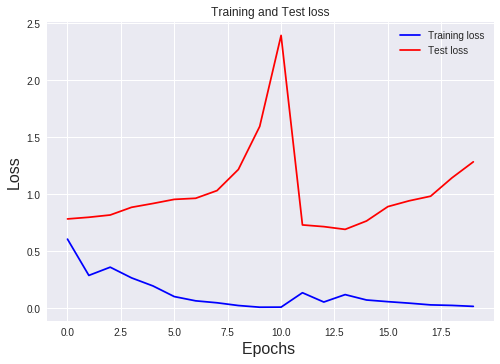

In [0]:
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

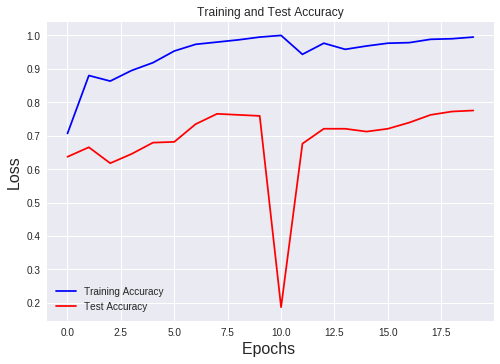

In [0]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()

## 5th try
> 1.   training_iters = 300 ,
learning_rate = 0.001 ,
batch_size = 600

> **2.   he_normal_initializer**

>  3. dropout X

> 4. ReLU 사용

> 5. RMSProp optimizer

**result**
> Iter 300, Loss= 0.000068, Training Accuracy= 1.00000  
Testing Accuracy: 0.77462

> ::iters 증가해서 더 돌려볼 것




Iter 10, Loss= 0.000000, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.07692
Iter 20, Loss= 0.029032, Training Accuracy= 0.99500
Optimization Finished!
Testing Accuracy: 0.31615
Iter 30, Loss= 0.094591, Training Accuracy= 0.99833
Optimization Finished!
Testing Accuracy: 0.32769
Iter 40, Loss= 0.010707, Training Accuracy= 0.99500
Optimization Finished!
Testing Accuracy: 0.34308
Iter 50, Loss= 0.000005, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.17077
Iter 60, Loss= 0.000002, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.17538
Iter 70, Loss= 0.011043, Training Accuracy= 0.99833
Optimization Finished!
Testing Accuracy: 0.32077
Iter 80, Loss= 0.000006, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.24615
Iter 90, Loss= 0.068684, Training Accuracy= 0.97333
Optimization Finished!
Testing Accuracy: 0.40692
Iter 100, Loss= 0.004840, Training Accuracy= 0.99667
Optimization Finished!
Testing Accurac

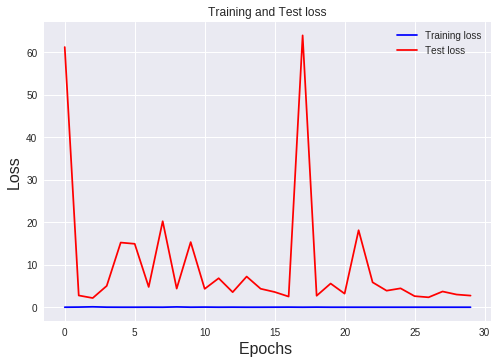

In [0]:
tf.reset_default_graph()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

tf.reset_default_graph()
a = tf.constant([1, 1, 1, 1, 1], dtype=tf.float32)
graph_level_seed = 1
operation_level_seed = 1
tf.set_random_seed(graph_level_seed)
b = tf.nn.dropout(a, 0.5, seed=operation_level_seed)


training_iters = 300 
learning_rate = 0.001 
batch_size = 600

#data input
n_input = 64

#total classes
n_classes = 3


#both placeholders are of type float
x = tf.placeholder("float", [None, n_input, n_input,1])
y = tf.placeholder("float", [None, n_classes])


def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) 

  
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')
  
def dropout2d(x, prob_conv=0.8):
  return tf.nn.dropout(x,prob_conv)

weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.keras.initializers.he_normal()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.keras.initializers.he_normal()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.keras.initializers.he_normal()), 
    'wd1': tf.get_variable('W3', shape=(8*8*128,128), initializer=tf.keras.initializers.he_normal()), 
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.keras.initializers.he_normal()), 
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.keras.initializers.he_normal()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.keras.initializers.he_normal()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.keras.initializers.he_normal()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.keras.initializers.he_normal()),
    'out': tf.get_variable('B4', shape=(n_classes), initializer=tf.keras.initializers.he_normal()),
}

def conv_net(x, weights, biases, dropout=False):  

    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)
    if dropout==True:
      conv1 = dropout2d(conv1)

    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)
    if dropout==True:
      conv2 = dropout2d(conv2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    conv3 = maxpool2d(conv3, k=2)
    if dropout==True:
      conv3 = dropout2d(conv3,prob_conv=0.5)

    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out
  
  
  
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)


#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# Initializing the variables
init = tf.global_variables_initializer()




#######################################################################

with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(1,training_iters+1):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        if i%10==0 :
          print("Iter " + str(i) + ", Loss= " + \
                        "{:.6f}".format(loss) + ", Training Accuracy= " + \
                        "{:.5f}".format(acc))
          print("Optimization Finished!")

          # Calculate accuracy for all test images
          test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X, y: test_y})
          train_loss.append(loss)
          test_loss.append(valid_loss)
          train_accuracy.append(acc)
          test_accuracy.append(test_acc)
          print("Testing Accuracy:","{:.5f}".format(test_acc))
    results = sess.run(correct_prediction,feed_dict={ x: test_X, y: test_y})
    summary_writer.close()
    
    ##########################################################
    
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

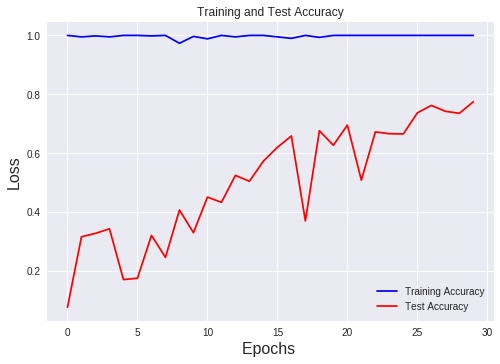

In [0]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()

## 6th try
> 1.   training_iters = 300 ,
learning_rate = 0.001 ,
batch_size = 600

> **2.   he_uniform_initializer**

>  3. dropout X

> 4. ReLU 사용

> 5. RMSProp optimizer

**result**
> Iter 300, Loss= 0.000000, Training Accuracy= 1.00000  
Testing Accuracy: 0.76923


Iter 10, Loss= 0.000000, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.23615
Iter 20, Loss= 0.148655, Training Accuracy= 0.98167
Optimization Finished!
Testing Accuracy: 0.27538
Iter 30, Loss= 0.017622, Training Accuracy= 0.99667
Optimization Finished!
Testing Accuracy: 0.30538
Iter 40, Loss= 0.000000, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.21846
Iter 50, Loss= 0.011088, Training Accuracy= 0.99500
Optimization Finished!
Testing Accuracy: 0.37000
Iter 60, Loss= 0.042894, Training Accuracy= 0.99500
Optimization Finished!
Testing Accuracy: 0.47846
Iter 70, Loss= 0.000059, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.43231
Iter 80, Loss= 0.008925, Training Accuracy= 0.99833
Optimization Finished!
Testing Accuracy: 0.48538
Iter 90, Loss= 0.000054, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.47462
Iter 100, Loss= 0.000000, Training Accuracy= 1.00000
Optimization Finished!
Testing Accurac

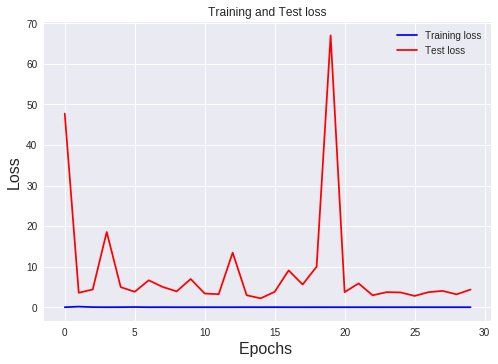

In [0]:
tf.reset_default_graph()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

tf.reset_default_graph()
a = tf.constant([1, 1, 1, 1, 1], dtype=tf.float32)
graph_level_seed = 1
operation_level_seed = 1
tf.set_random_seed(graph_level_seed)
b = tf.nn.dropout(a, 0.5, seed=operation_level_seed)


training_iters = 300 
learning_rate = 0.001 
batch_size = 600

#data input
n_input = 64

#total classes
n_classes = 3


#both placeholders are of type float
x = tf.placeholder("float", [None, n_input, n_input,1])
y = tf.placeholder("float", [None, n_classes])


def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) 

  
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')
  
def dropout2d(x, prob_conv=0.8):
  return tf.nn.dropout(x,prob_conv)

weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.initializers.he_uniform()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.initializers.he_uniform()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.initializers.he_uniform()), 
    'wd1': tf.get_variable('W3', shape=(8*8*128,128), initializer=tf.initializers.he_uniform()), 
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.initializers.he_uniform()), 
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.initializers.he_uniform()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.initializers.he_uniform()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.initializers.he_uniform()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.initializers.he_uniform()),
    'out': tf.get_variable('B4', shape=(n_classes), initializer=tf.initializers.he_uniform()),
}

def conv_net(x, weights, biases, dropout=False):  

    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)
    if dropout==True:
      conv1 = dropout2d(conv1)

    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)
    if dropout==True:
      conv2 = dropout2d(conv2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    conv3 = maxpool2d(conv3, k=2)
    if dropout==True:
      conv3 = dropout2d(conv3,prob_conv=0.5)

    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out
  
  
  
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)


#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# Initializing the variables
init = tf.global_variables_initializer()




#######################################################################

with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(1,training_iters+1):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        if i%10==0 :
          print("Iter " + str(i) + ", Loss= " + \
                        "{:.6f}".format(loss) + ", Training Accuracy= " + \
                        "{:.5f}".format(acc))
          print("Optimization Finished!")

          # Calculate accuracy for all test images
          test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X, y: test_y})
          train_loss.append(loss)
          test_loss.append(valid_loss)
          train_accuracy.append(acc)
          test_accuracy.append(test_acc)
          print("Testing Accuracy:","{:.5f}".format(test_acc))
    results = sess.run(correct_prediction,feed_dict={ x: test_X, y: test_y})
    summary_writer.close()
    
    ##########################################################
    
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()




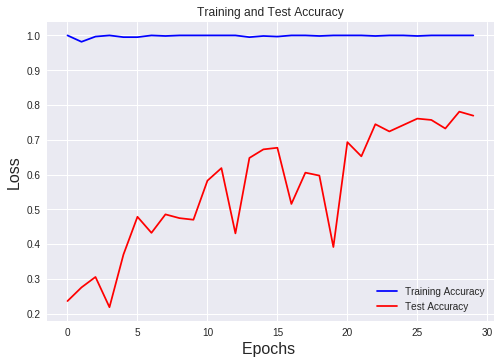

In [0]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()

## 7th try
> 1.   training_iters = 250 ,
learning_rate = 0.001 ,
batch_size = 600

> 2.   xavier_initializer

>  3. dropout X

> **4. leaky_ReLU 사용**

> 5. RMSProp optimizer

**result**
> Iter 250, Loss= 0.000000, Training Accuracy= 1.00000  
Testing Accuracy: 0.83769

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Iter 10, Loss= 0.000033, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.07692
Iter 20, Loss= 0.000137, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.11000
Iter 30, Loss= 0.027139, Training Accuracy= 0.99333
Optimization Finished!
Testing Accuracy: 0.22923
Iter 40, Loss= 0.010331, Training Accuracy= 0.99833
Optimization Finished!
Testing Accuracy: 0.30231
Iter 50, Loss= 0.011771, Training Accuracy= 0.99833
Optimization Finished!
Testing Accuracy: 0.34308
Iter 60, Loss= 0.028533, Training Accuracy= 0.99500
Optimization Finished!
Testing Accuracy: 0.53846
Iter 70, Loss= 0.033569, Training Accuracy= 0.99333
Optimization Finished!
Testing Accuracy: 0.54846
Iter 80, Loss= 0.003634, Training Accuracy= 0.99833
Optimization Finished!
Testing Accuracy: 0.58308
I

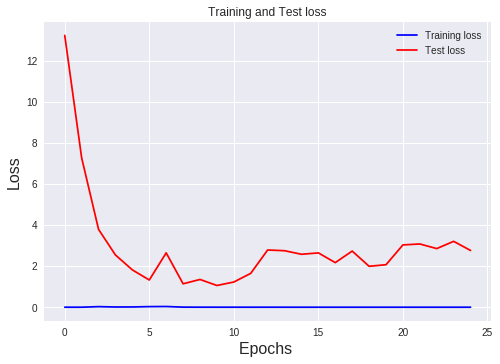

In [0]:
tf.reset_default_graph()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

tf.reset_default_graph()
a = tf.constant([1, 1, 1, 1, 1], dtype=tf.float32)
graph_level_seed = 1
operation_level_seed = 1
tf.set_random_seed(graph_level_seed)
b = tf.nn.dropout(a, 0.5, seed=operation_level_seed)


training_iters = 250 
learning_rate = 0.001 
batch_size = 600

#data input
n_input = 64

#total classes
n_classes = 3


#both placeholders are of type float
x = tf.placeholder("float", [None, n_input, n_input,1])
y = tf.placeholder("float", [None, n_classes])


def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.leaky_relu(x) 

  
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')
  
def dropout2d(x, prob_conv=0.8):
  return tf.nn.dropout(x,prob_conv)

weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wd1': tf.get_variable('W3', shape=(8*8*128,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(n_classes), initializer=tf.contrib.layers.xavier_initializer()),
}

def conv_net(x, weights, biases, dropout=False):  

    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)
    if dropout==True:
      conv1 = dropout2d(conv1)

    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)
    if dropout==True:
      conv2 = dropout2d(conv2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    conv3 = maxpool2d(conv3, k=2)
    if dropout==True:
      conv3 = dropout2d(conv3,prob_conv=0.5)

    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out
  
  
  
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)


#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# Initializing the variables
init = tf.global_variables_initializer()




#######################################################################

with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(1,training_iters+1):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        if i%10==0 :
          print("Iter " + str(i) + ", Loss= " + \
                        "{:.6f}".format(loss) + ", Training Accuracy= " + \
                        "{:.5f}".format(acc))
          print("Optimization Finished!")

          # Calculate accuracy for all test images
          test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X, y: test_y})
          train_loss.append(loss)
          test_loss.append(valid_loss)
          train_accuracy.append(acc)
          test_accuracy.append(test_acc)
          print("Testing Accuracy:","{:.5f}".format(test_acc))
    results = sess.run(correct_prediction,feed_dict={ x: test_X, y: test_y})
    summary_writer.close()
    
    ##########################################################
    
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()




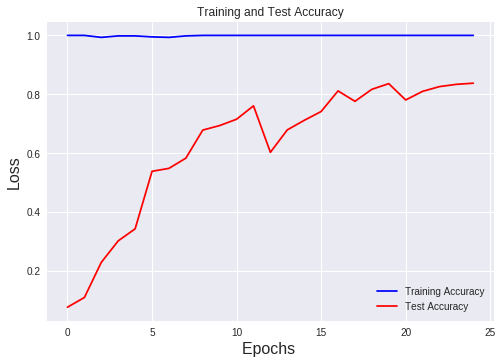

In [0]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()

## 8th try
> 1.   training_iters = 300 ,
learning_rate = 0.001 ,
batch_size = 600

> 2.   xavier_initializer

>  3. dropout X

> 4. leaky_ReLU 사용

> **5. Adam optimizer**

**result**
> Iter 300, Loss= 0.068626, Training Accuracy= 0.97333  
Testing Accuracy: 0.81231

Iter 10, Loss= 1.314059, Training Accuracy= 0.28833
Optimization Finished!
Testing Accuracy: 0.59231
Iter 20, Loss= 0.584877, Training Accuracy= 0.66000
Optimization Finished!
Testing Accuracy: 0.62462
Iter 30, Loss= 0.604794, Training Accuracy= 0.72000
Optimization Finished!
Testing Accuracy: 0.66692
Iter 40, Loss= 0.425569, Training Accuracy= 0.75667
Optimization Finished!
Testing Accuracy: 0.67154
Iter 50, Loss= 0.351313, Training Accuracy= 0.85000
Optimization Finished!
Testing Accuracy: 0.69000
Iter 60, Loss= 0.276146, Training Accuracy= 0.89000
Optimization Finished!
Testing Accuracy: 0.70769
Iter 70, Loss= 0.226223, Training Accuracy= 0.90500
Optimization Finished!
Testing Accuracy: 0.71846
Iter 80, Loss= 0.190772, Training Accuracy= 0.92833
Optimization Finished!
Testing Accuracy: 0.73154
Iter 90, Loss= 0.168502, Training Accuracy= 0.93333
Optimization Finished!
Testing Accuracy: 0.75231
Iter 100, Loss= 0.146458, Training Accuracy= 0.94000
Optimization Finished!
Testing Accurac

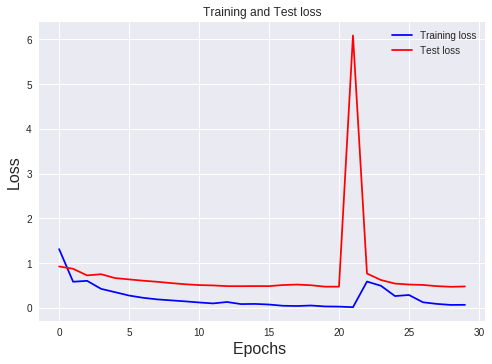

In [0]:
tf.reset_default_graph()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

tf.reset_default_graph()
a = tf.constant([1, 1, 1, 1, 1], dtype=tf.float32)
graph_level_seed = 1
operation_level_seed = 1
tf.set_random_seed(graph_level_seed)
b = tf.nn.dropout(a, 0.5, seed=operation_level_seed)


training_iters = 300
learning_rate = 0.001 
batch_size = 600

#data input
n_input = 64

#total classes
n_classes = 3


#both placeholders are of type float
x = tf.placeholder("float", [None, n_input, n_input,1])
y = tf.placeholder("float", [None, n_classes])


def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.leaky_relu(x) 

  
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')
  
def dropout2d(x, prob_conv=0.8):
  return tf.nn.dropout(x,prob_conv)

weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wd1': tf.get_variable('W3', shape=(8*8*128,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(n_classes), initializer=tf.contrib.layers.xavier_initializer()),
}

def conv_net(x, weights, biases, dropout=False):  

    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)
    if dropout==True:
      conv1 = dropout2d(conv1)

    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)
    if dropout==True:
      conv2 = dropout2d(conv2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    conv3 = maxpool2d(conv3, k=2)
    if dropout==True:
      conv3 = dropout2d(conv3,prob_conv=0.5)

    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out
  
  
  
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# Initializing the variables
init = tf.global_variables_initializer()




#######################################################################

with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(1,training_iters+1):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        if i%10==0 :
          print("Iter " + str(i) + ", Loss= " + \
                        "{:.6f}".format(loss) + ", Training Accuracy= " + \
                        "{:.5f}".format(acc))
          print("Optimization Finished!")

          # Calculate accuracy for all test images
          test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X, y: test_y})
          train_loss.append(loss)
          test_loss.append(valid_loss)
          train_accuracy.append(acc)
          test_accuracy.append(test_acc)
          print("Testing Accuracy:","{:.5f}".format(test_acc))
    results = sess.run(correct_prediction,feed_dict={ x: test_X, y: test_y})
    summary_writer.close()
    
    ##########################################################
    
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()






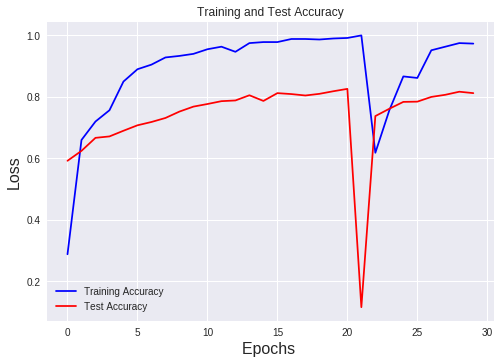

In [0]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()

## 층 1개 더 추가

## 1st try
> 1.   training_iters = 250,
learning_rate = 0.001 ,
batch_size = 600

> 2.   xavier_initializer

>  3. dropout X

> 4. ReLU 사용

> 5. RMSProp optimizer

**result**
> Iter 250, Loss= 0.000000, Training Accuracy= 1.00000  
Testing Accuracy: 0.84462

Iter 10, Loss= 0.098853, Training Accuracy= 0.97167
Optimization Finished!
Testing Accuracy: 0.15231
Iter 20, Loss= 0.112176, Training Accuracy= 0.94833
Optimization Finished!
Testing Accuracy: 0.35231
Iter 30, Loss= 0.033056, Training Accuracy= 0.99000
Optimization Finished!
Testing Accuracy: 0.29154
Iter 40, Loss= 0.019070, Training Accuracy= 0.99333
Optimization Finished!
Testing Accuracy: 0.40615
Iter 50, Loss= 0.028991, Training Accuracy= 0.99333
Optimization Finished!
Testing Accuracy: 0.48615
Iter 60, Loss= 0.008253, Training Accuracy= 0.99833
Optimization Finished!
Testing Accuracy: 0.50154
Iter 70, Loss= 0.001310, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.55538
Iter 80, Loss= 0.000106, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.52308
Iter 90, Loss= 0.000140, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.61231
Iter 100, Loss= 0.000004, Training Accuracy= 1.00000
Optimization Finished!
Testing Accurac

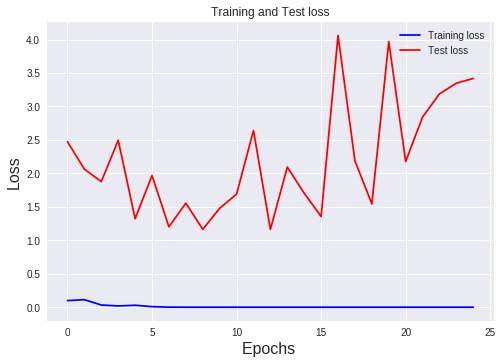

In [0]:
tf.reset_default_graph()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

tf.reset_default_graph()
a = tf.constant([1, 1, 1, 1, 1], dtype=tf.float32)
graph_level_seed = 1
operation_level_seed = 1
tf.set_random_seed(graph_level_seed)
b = tf.nn.dropout(a, 0.5, seed=operation_level_seed)


training_iters = 250 
learning_rate = 0.001 
batch_size = 600

#data input
n_input = 64

#total classes
n_classes = 3


#both placeholders are of type float
x = tf.placeholder("float", [None, n_input, n_input,1])
y = tf.placeholder("float", [None, n_classes])


def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.leaky_relu(x) 

  
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')
  
def dropout2d(x, prob_conv=0.8):
  return tf.nn.dropout(x,prob_conv)
  
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc4': tf.get_variable('W3', shape=(3,3,128,256), initializer=tf.contrib.layers.xavier_initializer()),
    'wd1': tf.get_variable('W4', shape=(4*4*256,256), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('W6', shape=(256,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bc4': tf.get_variable('B3', shape=(256), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B4', shape=(256), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B5', shape=(n_classes), initializer=tf.contrib.layers.xavier_initializer()),
}

def conv_net(x, weights, biases, dropout=False):  

    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)
    if dropout==True:
      conv1 = dropout2d(conv1)

    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)
    if dropout==True:
      conv2 = dropout2d(conv2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    conv3 = maxpool2d(conv3, k=2)
    if dropout==True:
      conv3 = dropout2d(conv3,prob_conv=0.5)
      
    conv4 = conv2d(conv3, weights['wc4'], biases['bc4'])
    conv4 = maxpool2d(conv4, k=2)

    fc1 = tf.reshape(conv4, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out
  
  
  
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)


#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# Initializing the variables
init = tf.global_variables_initializer()

#######################################################################

with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(1,training_iters+1):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        if i%10==0 :
          print("Iter " + str(i) + ", Loss= " + \
                        "{:.6f}".format(loss) + ", Training Accuracy= " + \
                        "{:.5f}".format(acc))
          print("Optimization Finished!")

          # Calculate accuracy for all test images
          test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X, y: test_y})
          train_loss.append(loss)
          test_loss.append(valid_loss)
          train_accuracy.append(acc)
          test_accuracy.append(test_acc)
          print("Testing Accuracy:","{:.5f}".format(test_acc))
    results = sess.run(correct_prediction,feed_dict={ x: test_X, y: test_y})
    summary_writer.close()
    
    ##########################################################
    
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()


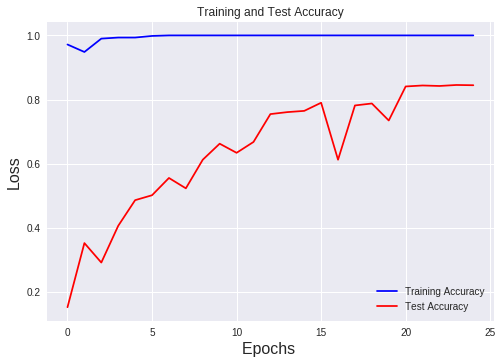

In [0]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()

## 2nd try
> 1.   training_iters = 250,
learning_rate = 0.001 ,
batch_size = 600

> 2.   xavier_initializer

>  3. dropout X

> 4. ReLU 사용

> 5. Adam optimizer

**result**
> Iter 250, Loss= 0.000000, Training Accuracy= 1.00000  
Testing Accuracy: 0.84462

Iter 10, Loss= 0.738834, Training Accuracy= 0.69167
Optimization Finished!
Testing Accuracy: 0.63308
Iter 20, Loss= 0.450691, Training Accuracy= 0.81500
Optimization Finished!
Testing Accuracy: 0.69231
Iter 30, Loss= 0.314186, Training Accuracy= 0.85667
Optimization Finished!
Testing Accuracy: 0.72231
Iter 40, Loss= 0.256788, Training Accuracy= 0.88000
Optimization Finished!
Testing Accuracy: 0.73385
Iter 50, Loss= 0.214256, Training Accuracy= 0.90667
Optimization Finished!
Testing Accuracy: 0.75000
Iter 60, Loss= 0.177975, Training Accuracy= 0.92167
Optimization Finished!
Testing Accuracy: 0.75154
Iter 70, Loss= 0.149967, Training Accuracy= 0.93333
Optimization Finished!
Testing Accuracy: 0.76385
Iter 80, Loss= 0.130407, Training Accuracy= 0.94500
Optimization Finished!
Testing Accuracy: 0.76846
Iter 90, Loss= 0.114307, Training Accuracy= 0.96000
Optimization Finished!
Testing Accuracy: 0.77231
Iter 100, Loss= 0.099253, Training Accuracy= 0.96167
Optimization Finished!
Testing Accurac

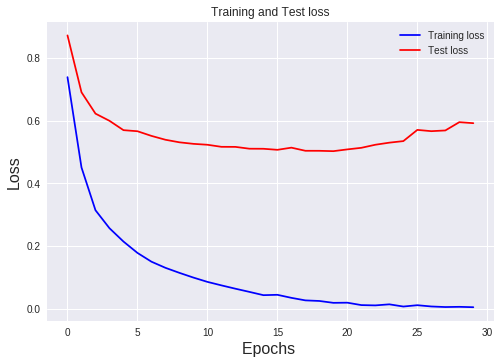

In [0]:
tf.reset_default_graph()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

tf.reset_default_graph()
a = tf.constant([1, 1, 1, 1, 1], dtype=tf.float32)
graph_level_seed = 1
operation_level_seed = 1
tf.set_random_seed(graph_level_seed)
b = tf.nn.dropout(a, 0.5, seed=operation_level_seed)


training_iters = 300 
learning_rate = 0.0001
batch_size = 600

#data input
n_input = 64

#total classes
n_classes = 3


#both placeholders are of type float
x = tf.placeholder("float", [None, n_input, n_input,1])
y = tf.placeholder("float", [None, n_classes])


def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.leaky_relu(x) 

  
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')
  
def dropout2d(x, prob_conv=0.8):
  return tf.nn.dropout(x,prob_conv)
  
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc4': tf.get_variable('W3', shape=(3,3,128,256), initializer=tf.contrib.layers.xavier_initializer()),
    'wd1': tf.get_variable('W4', shape=(4*4*256,256), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('W6', shape=(256,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bc4': tf.get_variable('B3', shape=(256), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B4', shape=(256), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B5', shape=(n_classes), initializer=tf.contrib.layers.xavier_initializer()),
}

def conv_net(x, weights, biases, dropout=False):  

    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)
    if dropout==True:
      conv1 = dropout2d(conv1)

    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)
    if dropout==True:
      conv2 = dropout2d(conv2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    conv3 = maxpool2d(conv3, k=2)
    if dropout==True:
      conv3 = dropout2d(conv3,prob_conv=0.5)
      
    conv4 = conv2d(conv3, weights['wc4'], biases['bc4'])
    conv4 = maxpool2d(conv4, k=2)

    fc1 = tf.reshape(conv4, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out
  
  
  
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# Initializing the variables
init = tf.global_variables_initializer()

#######################################################################

with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(1,training_iters+1):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x,
                                                              y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y})
        if i%10==0 :
          print("Iter " + str(i) + ", Loss= " + \
                        "{:.6f}".format(loss) + ", Training Accuracy= " + \
                        "{:.5f}".format(acc))
          print("Optimization Finished!")

          # Calculate accuracy for all test images
          test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X, y: test_y})
          train_loss.append(loss)
          test_loss.append(valid_loss)
          train_accuracy.append(acc)
          test_accuracy.append(test_acc)
          print("Testing Accuracy:","{:.5f}".format(test_acc))
    results = sess.run(correct_prediction,feed_dict={ x: test_X, y: test_y})
    summary_writer.close()
    
    ##########################################################
    
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()


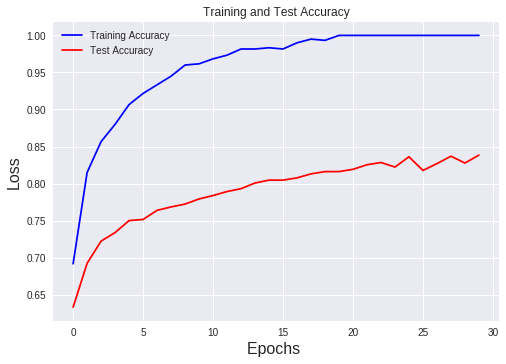

In [0]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()